# Web Scrapping

In [65]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
url = "https://en.wikipedia.org/wiki/World_population"

response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

soup.title

<title>World population - Wikipedia</title>

In [47]:
# Print in readable html format
# print(soup.prettify())

In [56]:
# find all the tables
tables = soup.find_all("table")

# storing the tables it the dataframe
dataframe = [] # empty list

for i, table in enumerate(tables):
    rows = table.find_all("tr")[1:] # skip the first row
    data = [] # empty list
    for row in rows:
        cols = row.find_all("td")
        cols = [col.text.strip() for col in cols]
        data.append(cols)
    df = pd.DataFrame(data)
    dataframe.append(df)

# Store the dataframe as csv
dataframe[11].to_csv("world_population_over_time.csv", index=False)

In [70]:
# read the csv file
dataframe = pd.read_csv("world_population_over_time.csv")
dataframe.head()

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,"2,543,130,380",1.75%,"43,808,223",17.0
2,"2,590,270,899",1.85%,"47,140,519",17.0
3,"2,640,278,797",1.93%,"50,007,898",18.0
4,"2,691,979,339",1.96%,"51,700,542",18.0


In [72]:
# Drop the first row by index
dataframe = dataframe.drop(dataframe.index[0])

# change the index to year
start_year = 1951
dataframe.index = range(start_year, start_year + len(dataframe))
dataframe.index.name = "year"
# Renaming the columns (excluding the index)
dataframe.columns = ['population', 'yearly_growth_percentage', 'yearly_growth_number', 'density']

In [73]:
dataframe.tail()

,population,yearly_growth_percentage,yearly_growth_number,density
year,,,,
2018,"7,764,951,032",1.06%,"81,161,204",52.0
2019,"7,840,952,880",0.98%,"76,001,848",53.0
2020,"7,909,295,151",0.87%,"68,342,271",53.0
2021,"7,975,105,156",0.83%,"65,810,005",54.0
2022,"8,045,311,447",0.88%,"70,206,291",54.0


In [74]:
dataframe.dtypes

population                   object
yearly_growth_percentage     object
yearly_growth_number         object
density                     float64
dtype: object

In [75]:
# Convert 'population' column to numeric
dataframe['population'] = dataframe['population'].replace({',': ''}, regex=True).astype(float)
dataframe['yearly_growth_number'] = dataframe['yearly_growth_number'].replace({',': ''}, regex=True).astype(float)
dataframe['yearly_growth_percentage'] = dataframe['yearly_growth_percentage'].replace({'%': ''}, regex=True).astype(float)

In [77]:
dataframe.dtypes

population                  float64
yearly_growth_percentage    float64
yearly_growth_number        float64
density                     float64
dtype: object

In [98]:
len(dataframe)

72

C:\Users\PS144\AppData\Local\Temp\ipykernel_24776\3779243514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x='year', y='population', palette='viridis')


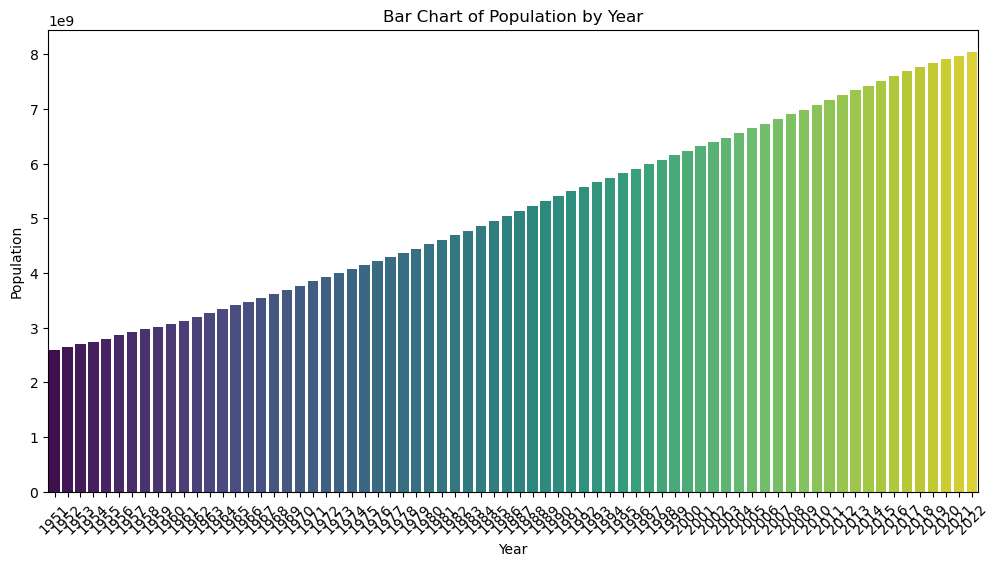

In [85]:
# Create bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=dataframe, x='year', y='population', palette='viridis')

# Set x-axis label
plt.xlabel('Year')

# Set y-axis label
plt.ylabel('Population')

# Set title
plt.title('Bar Chart of Population by Year')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

# Show plot
plt.show()

In [102]:
# Create a line plot with Plotly Express
fig = plty.line(dataframe.reset_index(), x='year', y=['population', 'yearly_growth_number'])

# Update layout with custom labels and title
fig.update_layout(
    title='Line Plot of Population and Yearly Growth Number by Year',
    xaxis_title='Year',
    yaxis_title='Value',
    legend_title='Legend',
    template='plotly_dark'  # Optional: Use a dark theme for the plot
)

# Show plot
fig.show()